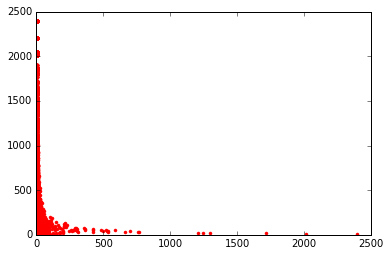

[-0.44417355  6.32762495]


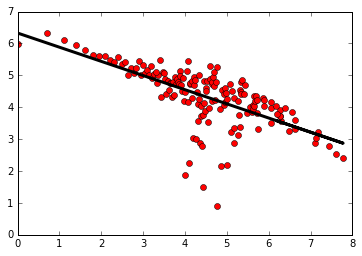

In [30]:
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random as rm
from scipy import optimize


def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data
science = nx.read_gml("netscience.gml")
    
#ESCRIBO EL CODIGO PARA "JULY" Y LUEGO LO REPITO PARA "SCIENCE".
#ARMO UNA LISTA DE LOS NODOS.
july = nx.read_gml("as-22july06.gml")
july_nodos = july.nodes()
july_nodos_lista = list(july_nodos) #ESTO TRANSFORMA A LISTA CUALQUIER VARIABLE. ACA TENGO LOS NODOS.

#VEO LAS UNIONES DE ESOS NODOS.
uniones = []
for i in range (len(july_nodos_lista)):
    union = []
    for nodo in july.neighbors(july_nodos_lista[i]):
        union.append(nodo)
    uniones.append (union)

#VEO EL GRADO DE CADA NODO.
grados_por_nodo = []
for l in range (len(july_nodos_lista)):
    grado_nodo_l = july.degree(july_nodos_lista[l])
    grados_por_nodo.append(grado_nodo_l)

#VEO EL GRADO DE MIS VECINOS.
grados_vecino_por_nodo = []
for l in range (len(uniones)):
    grados_nodos_vecinos = []
    for m in range (len(uniones[l])):
        grado_nodo_m = july.degree(uniones[l][m])
        grados_nodos_vecinos.append(grado_nodo_m)
    grados_vecino_por_nodo.append(grados_nodos_vecinos)

#CALCULO VALOR MEDIO DE LOS VECINOS DE NODOS DE GRADO K.
promedio_vecinos = []
for i in grados_vecino_por_nodo:
    val_medio_por_vecinos = np.mean (i)
    promedio_vecinos.append (val_medio_por_vecinos)

nombre_gnodo_gvecinos = []
for n,g,v in zip(july_nodos_lista,grados_por_nodo,promedio_vecinos):
    nombre_gnodo_gvecinos.append([n,g,v])

gnodo_vmedio_vecinos = []
grados = list(set(grados_por_nodo))
for grado in grados:
    m = []
    for i in nombre_gnodo_gvecinos:
        if i[1] == grado:
             m.append(i[2])
    m_valmedio = np.mean (m)
    gnodo_vmedio_vecinos.append([grado,m_valmedio])




#x_2 = np.zeros (len(nombre_gnodo_gvecinos))
#y_2 = np.zeros (len(nombre_gnodo_gvecinos))
#for i in range (len(nombre_gnodo_gvecinos)):
 #   x_2[i] = nombre_gnodo_gvecinos[i][1]
  #  y_2[i] = nombre_gnodo_gvecinos[i][2]
    
#plt.plot (x_2,y_2,"r.")
#plt.show ()

x = np.zeros (len(gnodo_vmedio_vecinos))
y = np.zeros (len(gnodo_vmedio_vecinos))
for i in range (len(gnodo_vmedio_vecinos)):
    x[i] = gnodo_vmedio_vecinos[i][0]
    y[i] = gnodo_vmedio_vecinos[i][1]

x_log = np.log (x)
y_log = np.log (y)

#CON ESTO ARMO LA FUNCION QUE FITEA LOS DATOS LOGARITMICOS.
fitfunc = lambda p, x_log: p[0]*x_log+p[1]
p0 = [1, 1]

errfunc = lambda p, x_log, y_log: fitfunc(p, x_log) - y_log
p1, suc = optimize.leastsq(errfunc, p0[:], args=(x_log, y_log)) #EL P1 TIENE LOS ELEMENTOS DE MI FITEO. los parametros de mi lineal.
plt.plot(x_log, y_log, "ro", x_log, fitfunc(p1, x_log), "k-", linewidth=3)
print (p1)

#plt.plot (np.log(x),np.log(y),"r.")

plt.show ()


In [15]:
listita = [2,4,5,9,87,2,3,5,4]
lista = list(set(listita))
print (listita)
print (lista)

[2, 4, 5, 9, 87, 2, 3, 5, 4]
[2, 3, 4, 5, 9, 87]
